In [1]:
from gradio_client import Client

In [2]:
# client = Client("https://one-2-3-45-one-2-3-45.hf.space/")
input_img_path = "https://huggingface.co/spaces/One-2-3-45/One-2-3-45/resolve/main/demo_examples/01_wild_hydrant.png"

# ### Single image to 3D mesh
# generated_mesh_filepath = client.predict(
#         input_img_path, 
#         True,           # image preprocessing
#         api_name="/generate_mesh"
# )

In [1]:
generated_mesh_filepath = "/tmp/gradio/93032575eaccd840ff9d673be171e14aaa39df03/mesh_00215000_gradio_lod0.ply"
print("Generated mesh saved at:", generated_mesh_filepath)

Generated mesh saved at: /tmp/gradio/93032575eaccd840ff9d673be171e14aaa39df03/mesh_00215000_gradio_lod0.ply


In [2]:
import open3d as o3d

point_cloud = o3d.io.read_point_cloud(generated_mesh_filepath)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
print("Point cloud loaded:", point_cloud.points)

Point cloud loaded: std::vector<Eigen::Vector3d> with 24096 elements.
Use numpy.asarray() to access data.


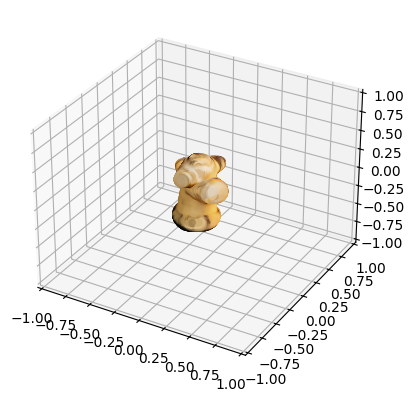

In [4]:

#plot the point cloud with matlpotlib
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
colors = np.asarray(point_cloud.colors)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.asarray(point_cloud.points)[:,0], np.asarray(point_cloud.points)[:,1], np.asarray(point_cloud.points)[:,2], c=colors)

#set axis limits
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

plt.show()


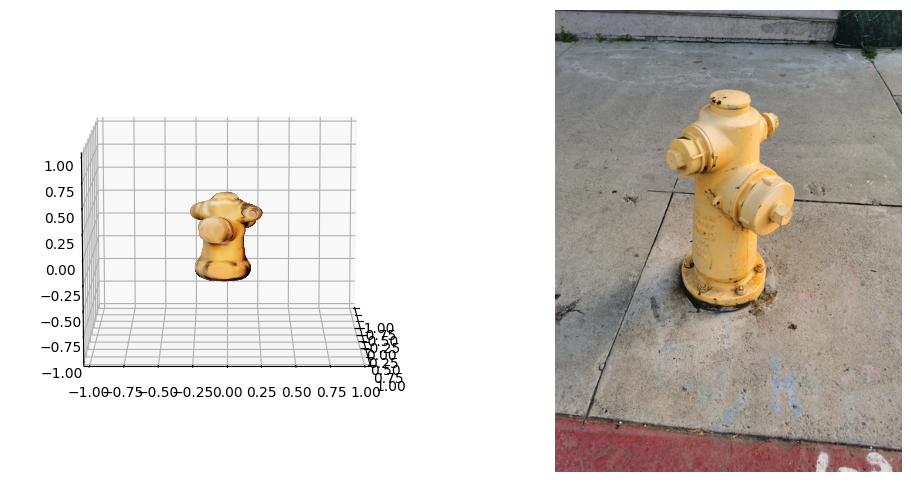

MovieWriter imagemagick unavailable; using Pillow instead.


In [5]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import urllib.request


colors = np.asarray(point_cloud.colors)

# Load external image
image_url =  "https://huggingface.co/spaces/One-2-3-45/One-2-3-45/resolve/main/demo_examples/01_wild_hydrant.png"

image = np.array(Image.open(urllib.request.urlopen(image_url)))

# Prepare the figure with subplots
fig = plt.figure(figsize=(12, 6))

# Axis for the 3D plot
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(np.asarray(point_cloud.points)[:, 0], 
                     np.asarray(point_cloud.points)[:, 1], 
                     np.asarray(point_cloud.points)[:, 2], 
                     c=colors)

# Set axis limits for 3D plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Axis for the image
ax_img = fig.add_subplot(122)
ax_img.imshow(image)
ax_img.axis('off')  # Turn off axis for the image

# Update function for the animation
def update(frame):
    # Rotate around the Z-axis by changing the azimuth angle
    ax.view_init(elev=10, azim=frame * (360 / 100))  # Adjust azimuth over 100 frames
    return scatter,

# Create animation
ani = FuncAnimation(fig, update, frames=range(100), interval=100, blit=True)

plt.show()

#save animation

ani.save('point_cloud_animation.gif', writer='imagemagick', fps=30)

